In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import math 
import numpy as np


from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


/Users/karsai/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def plot(model, gamma, C, X_train, X_test, y_train, y_test, ax):
    
    h = .02  # step size in the mesh

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.4)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    # Plot support vectors  
    ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            linewidth=2, facecolors='none', edgecolor='#5BC236');
    
    # Plot statistics labels
    ax.text(xx.max() - .3, yy.min() + .3, ('score = %.4f' %model.score(X_test, y_test)).rstrip('0'),
            size=12, horizontalalignment='right')
    ax.text(xx.max() - .3, yy.min() + .5, ('$\gamma$ = %f' % gamma).rstrip('0'),
            size=12, horizontalalignment='right')
    ax.text(xx.max() - .3, yy.min() + .7, ('C = %.2f' % C).lstrip('0'),
            size=12, horizontalalignment='right')

In [3]:
# Data creation
X, y = make_circles(100, noise=0.2, factor=0.5, random_state=43)

# Data preparation
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=43)

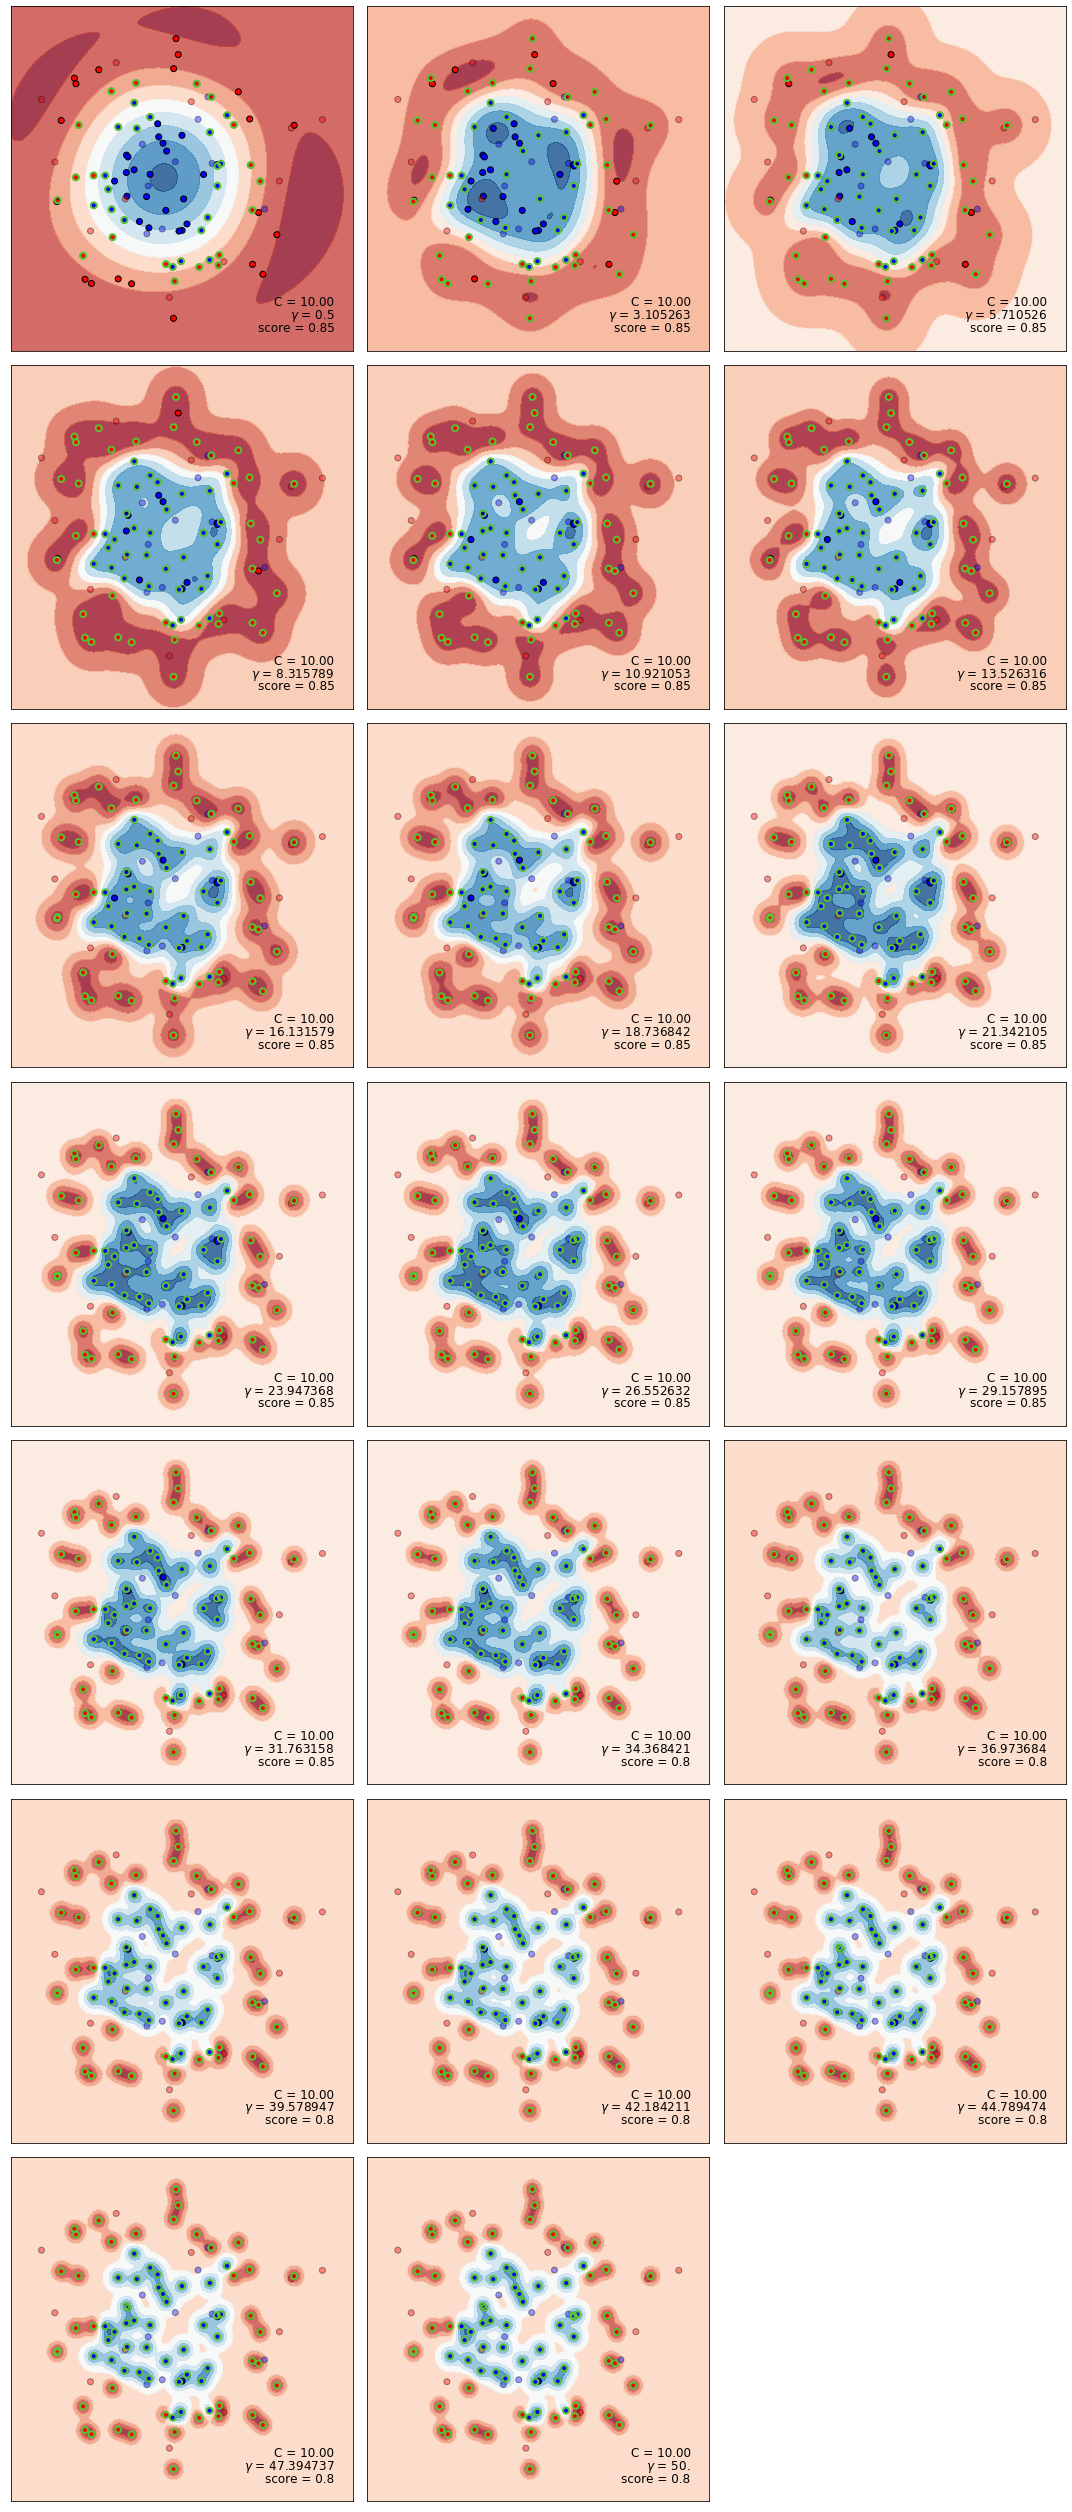

In [4]:
C_range = [10]
# gamma_range = 10. ** np.arange(-5, 4)
gamma_range = np.linspace(0.5, 50, 20)

# Data plotting 
ncols = 3
nrows = math.ceil((len(C_range) * len(gamma_range))/ncols)

plt.figure(figsize=(ncols * 5, nrows * 5))

i = 0
for gamma in gamma_range:
    for C in C_range:
        
        model = SVC(kernel='rbf', gamma=gamma)
        model.fit(X_train, y_train)
        
        ax = plt.subplot(nrows, ncols, i+1)
        
        plot(model, gamma, C, X_train, X_test, y_train, y_test, ax)
        
        i+=1
        
plt.tight_layout()

In [5]:
# Data creation
X, y = make_moons(noise=0.3, random_state=0)

# Data preparation
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=43)

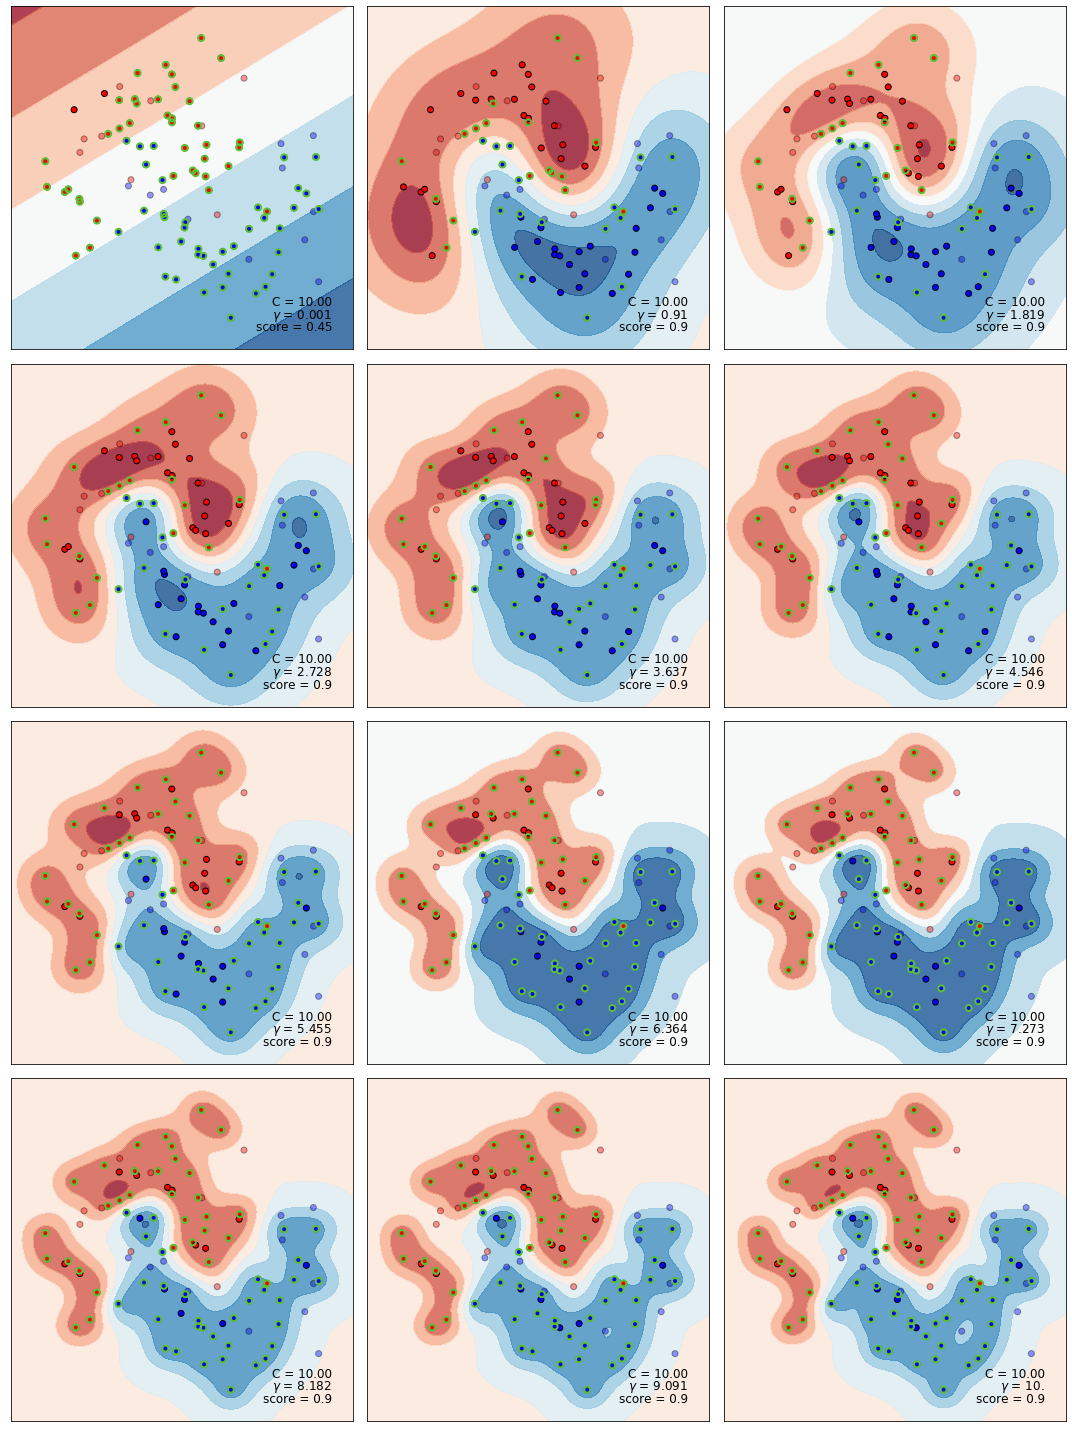

In [6]:
C_range = [10]
gamma_range = np.linspace(0.001, 10, 12)

# Data plotting 
ncols = 3
nrows = math.ceil((len(C_range) * len(gamma_range))/ncols)

plt.figure(figsize=(ncols * 5, nrows * 5))

i = 0
for gamma in gamma_range:
    for C in C_range:
        
        model = SVC(kernel='rbf', gamma=gamma)
        model.fit(X_train, y_train)
        
        ax = plt.subplot(nrows, ncols, i+1)
        
        plot(model, gamma, C, X_train, X_test, y_train, y_test, ax)
        
        i+=1
        
plt.tight_layout()